In [1]:
# import library

import pandas as pd
import missingno as msno
from category_encoders import TargetEncoder
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot as plt
import numpy as np

# import data

In [2]:
sales_train = pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv")
sales_test = pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv")

In [3]:
sales_train.shape

(188533, 13)

# self defined min max scaler

In [4]:
def min_max_scaler(df, col_name):
    min_val = df[col_name].min()
    max_val = df[col_name].max()
    return (df[col_name]-min_val)/(max_val-min_val)

# null values

<Axes: >

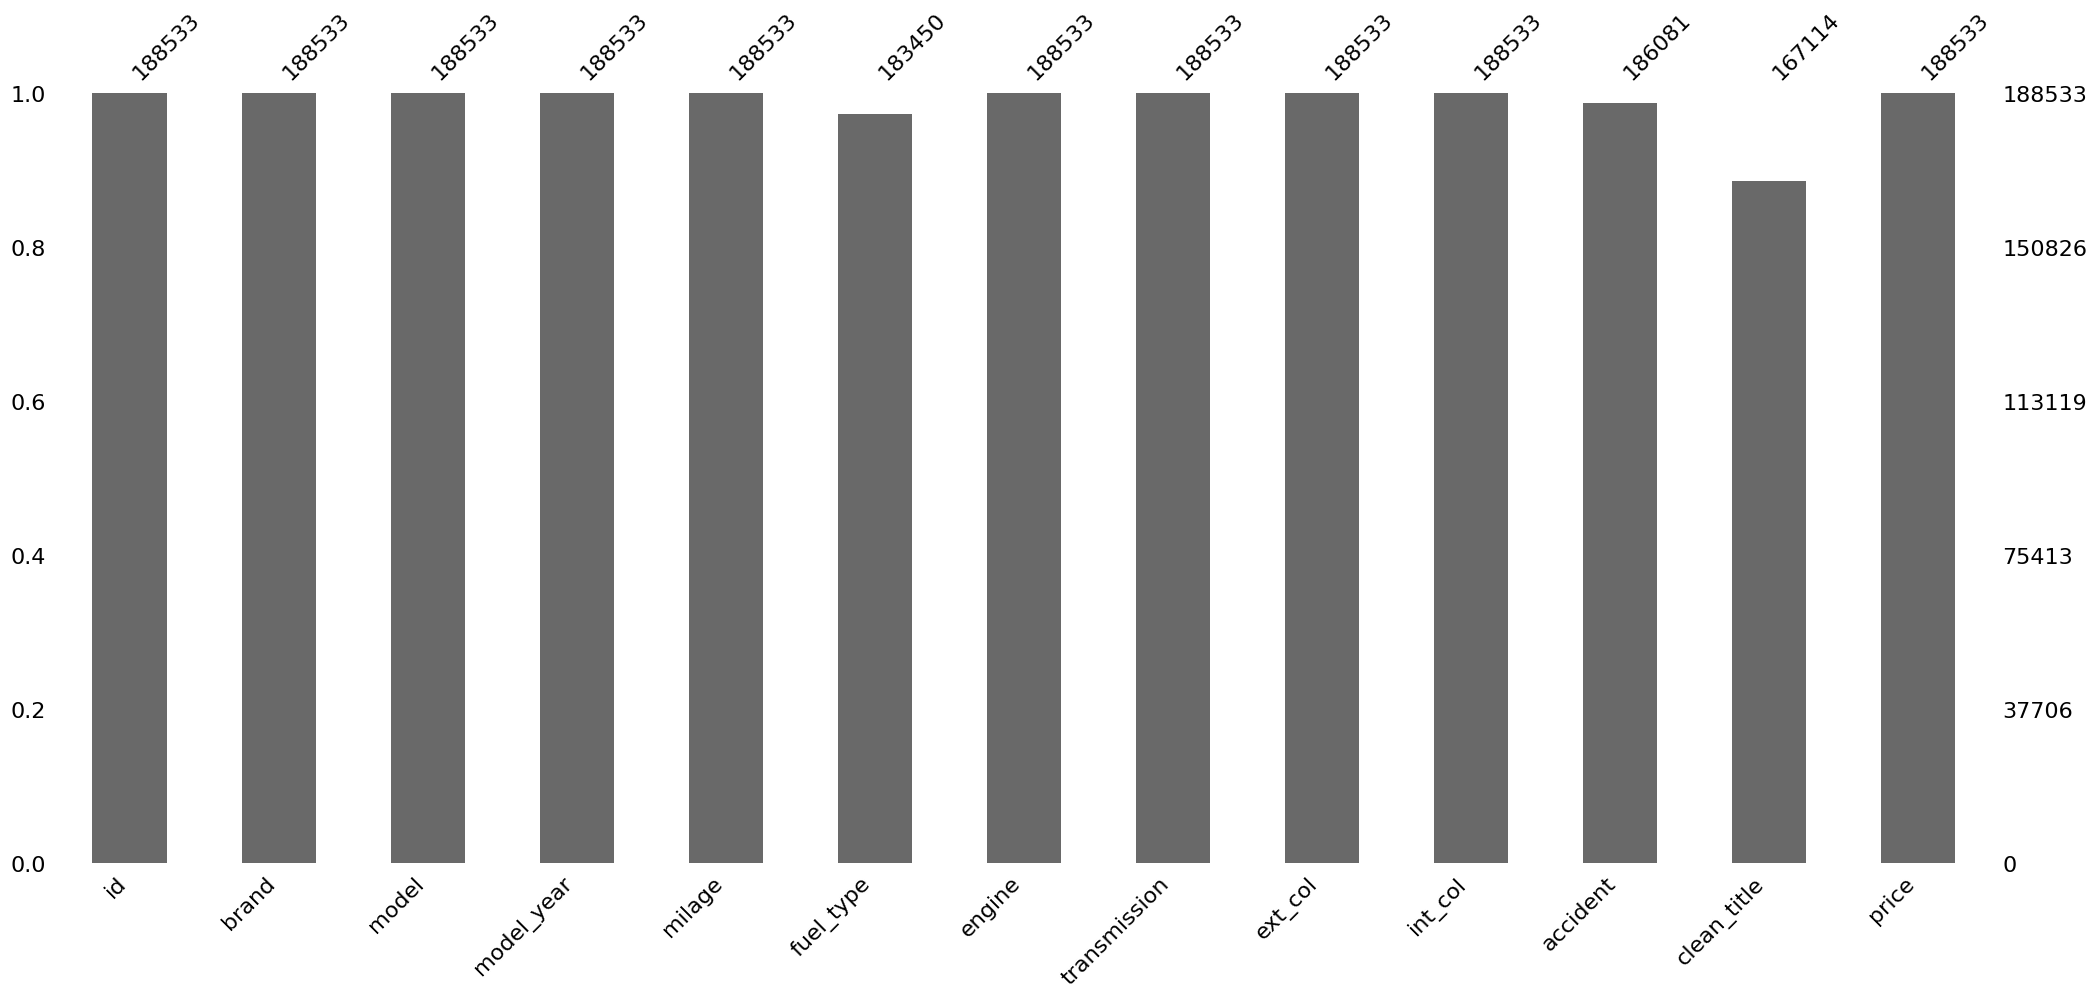

In [5]:
msno.bar(sales_train)

<Axes: >

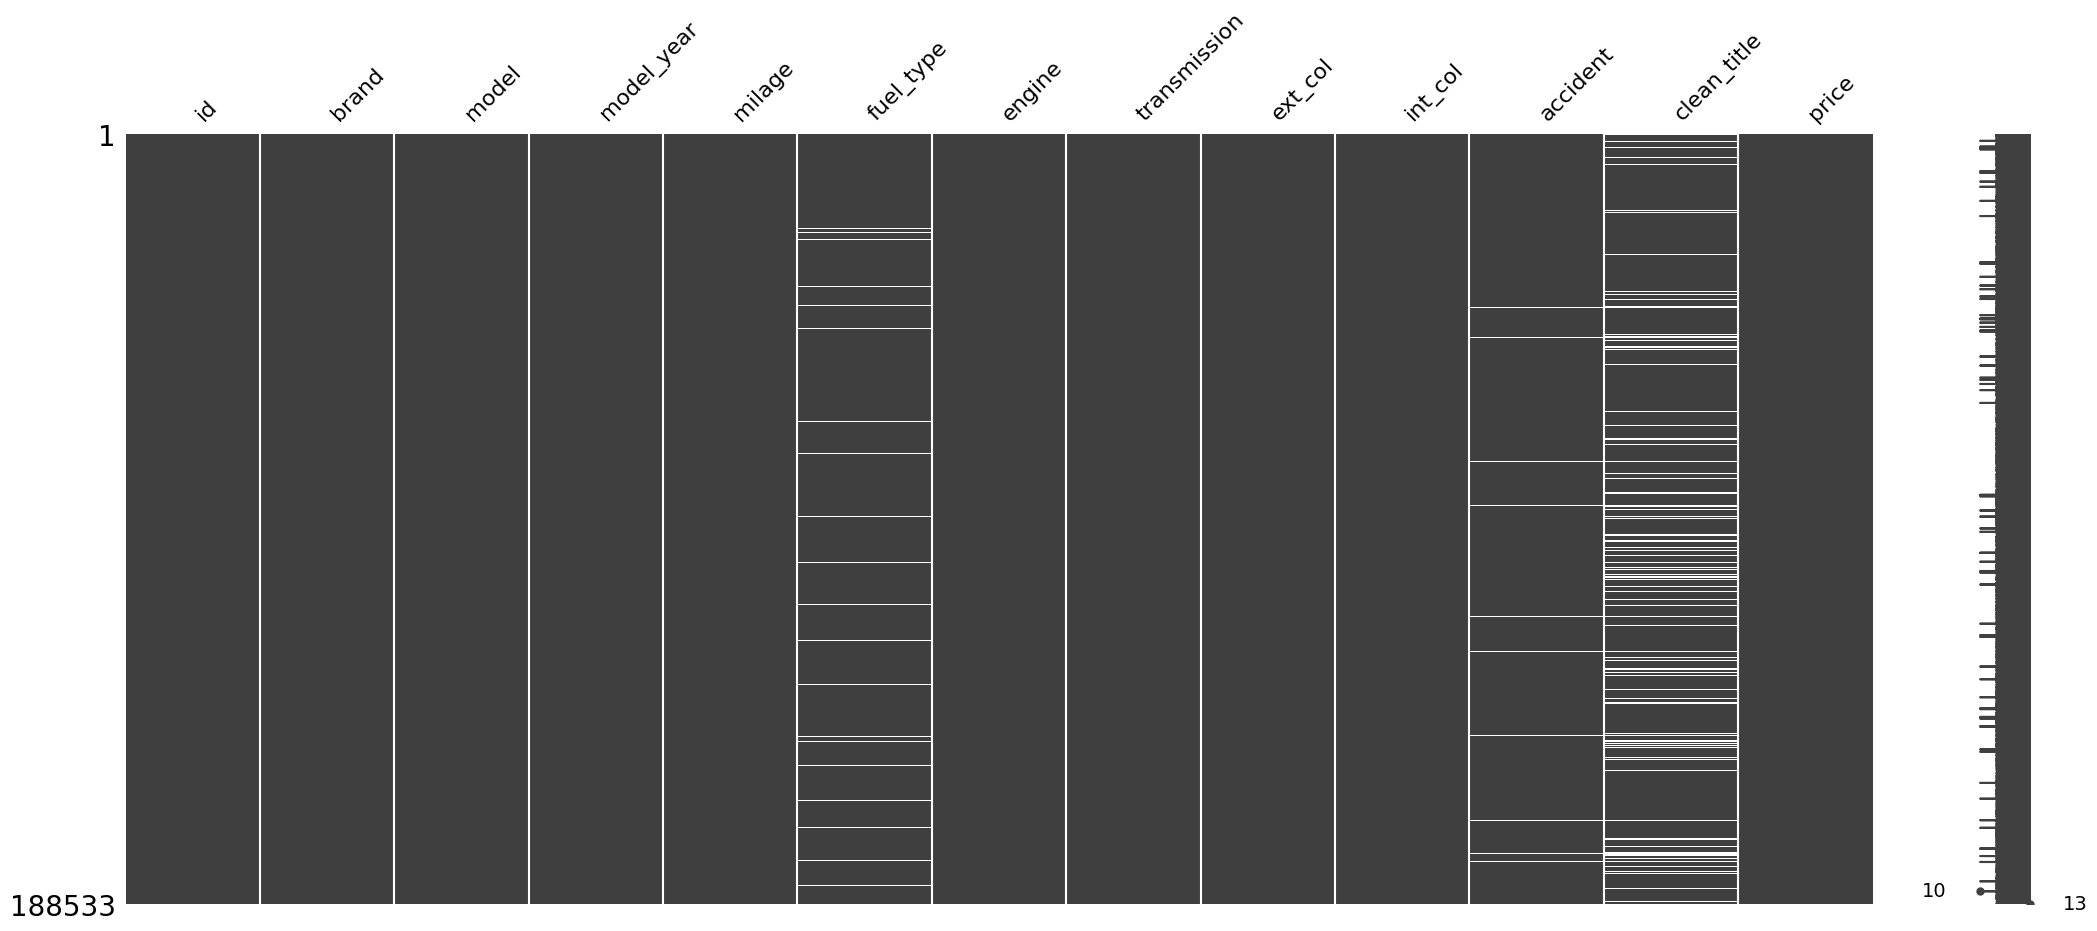

In [6]:
msno.matrix(sales_train)

<Axes: >

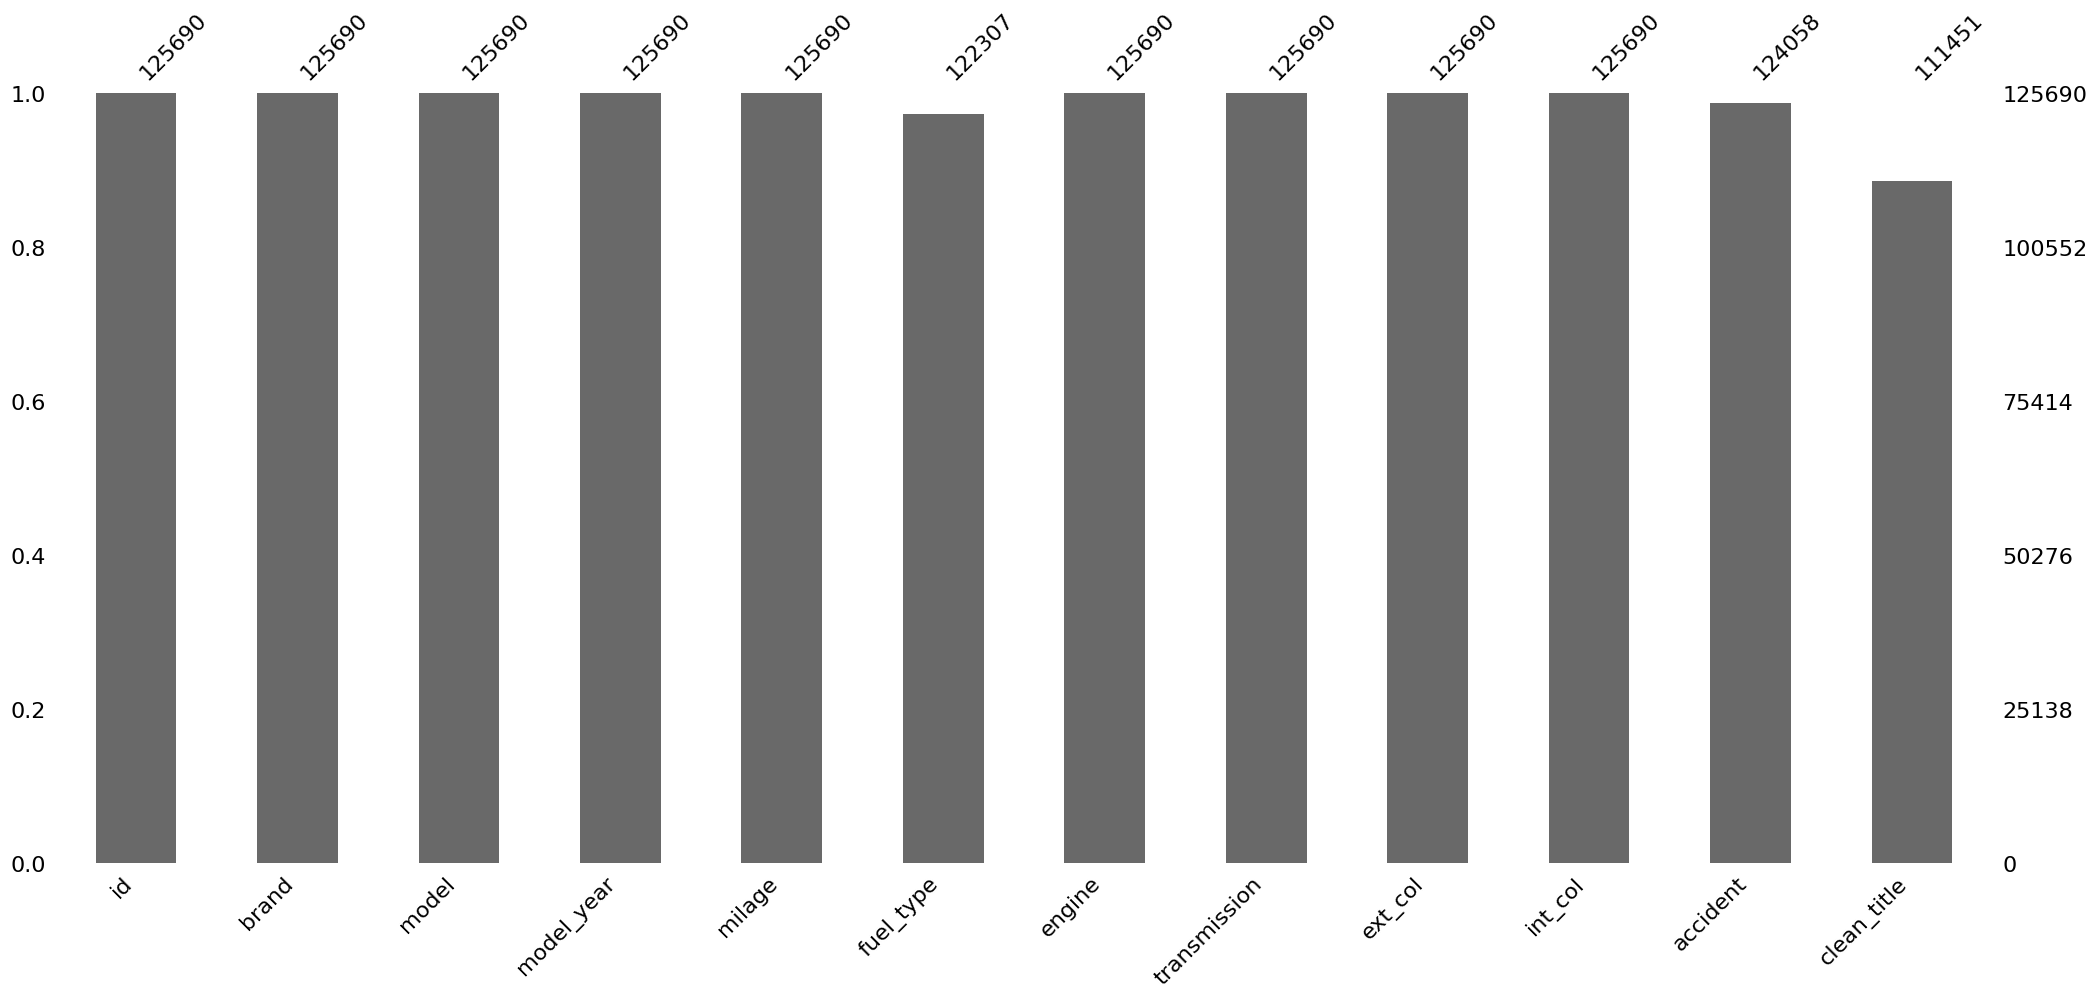

In [7]:
msno.bar(sales_test)

<Axes: >

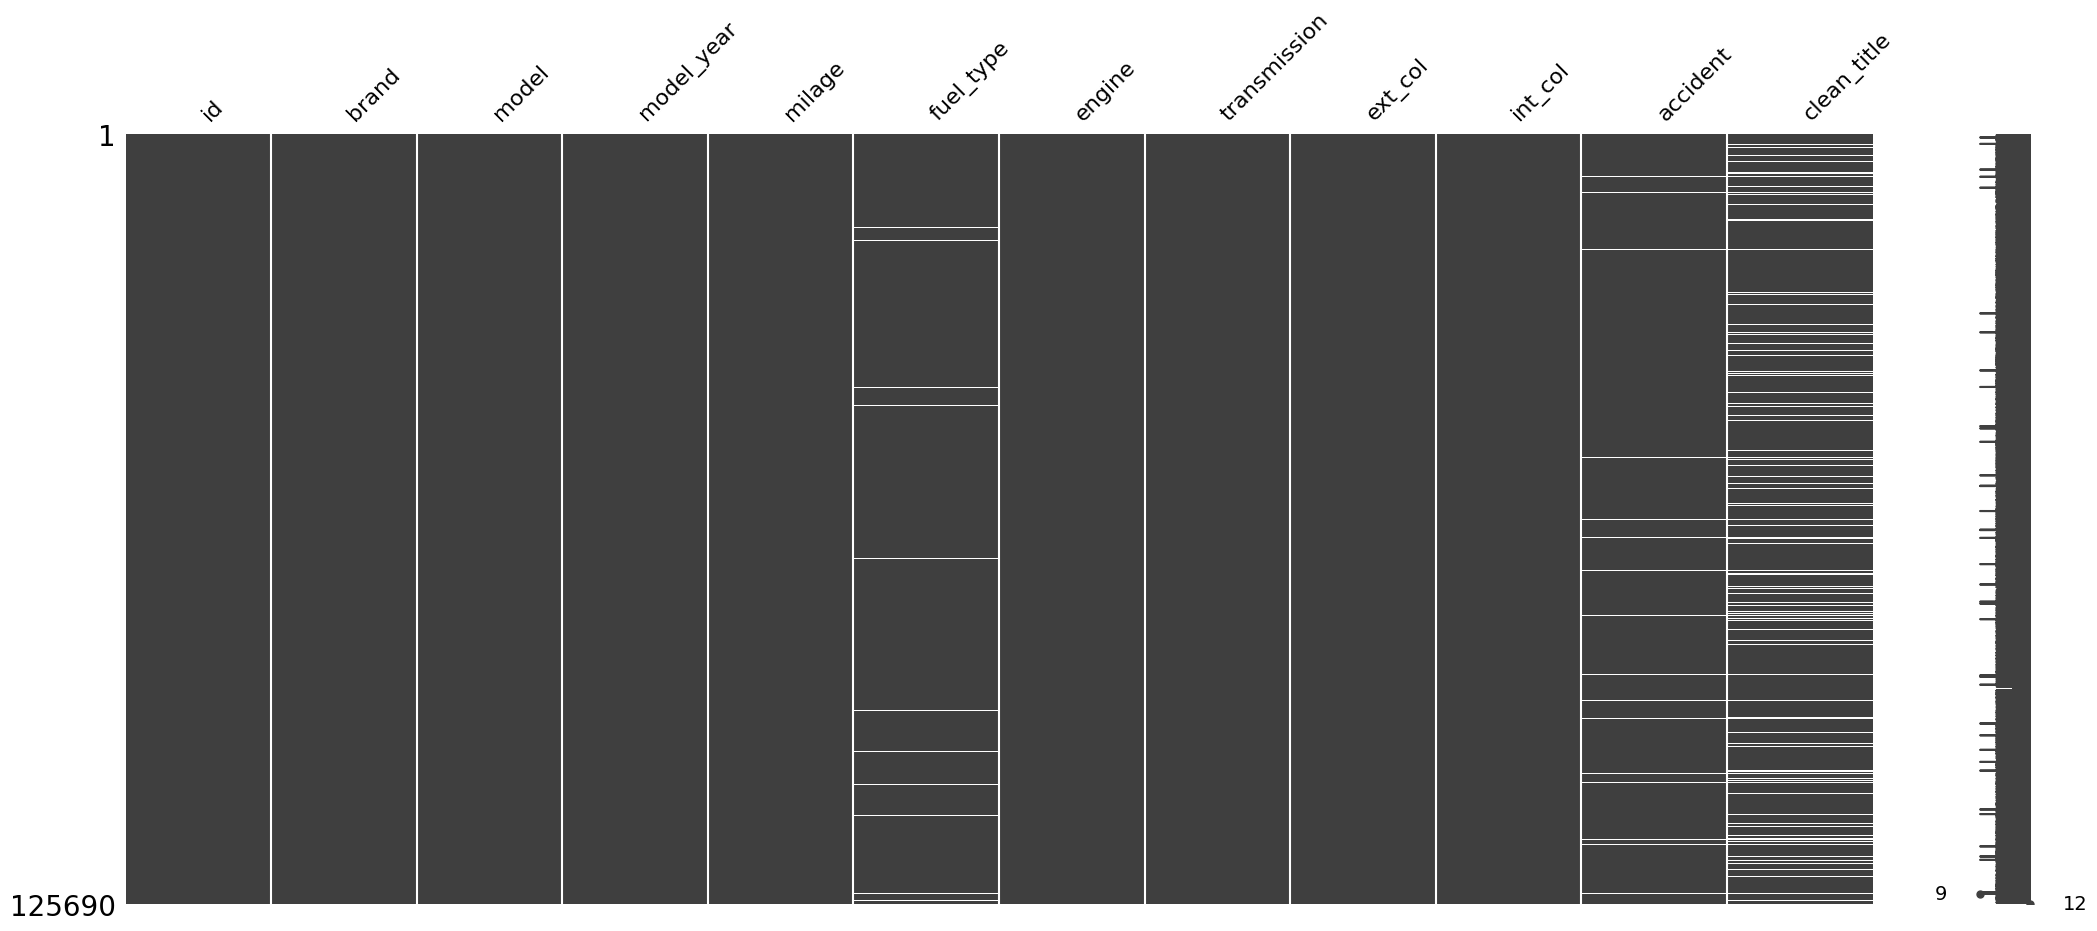

In [8]:
msno.matrix(sales_test)

## null values summary
Columns with missing values: 
- fuel_type
- accident
- clean_title

And this is consistent (i.e. same null columns) in test data

# drop id

In [9]:
test_id = sales_test['id']
sales_train.drop('id', axis=1, inplace=True)
sales_test.drop('id', axis=1, inplace=True)
print(sales_train.columns)
print(sales_test.columns)

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')
Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')


# brand

In [10]:
sales_train.groupby(['brand'])['brand'].count()

brand
Acura             2282
Alfa               682
Aston              238
Audi             10887
BMW              17028
Bentley           1155
Bugatti              7
Buick              940
Cadillac          4674
Chevrolet        16335
Chrysler           727
Dodge             3133
FIAT                44
Ferrari            359
Ford             23088
GMC               3215
Genesis            969
Honda             2101
Hummer             520
Hyundai           2045
INFINITI          3276
Jaguar            1319
Jeep              6474
Karma               17
Kia               2497
Lamborghini        809
Land              9525
Lexus             8643
Lincoln           2423
Lotus               52
Lucid               69
MINI              1064
Maserati           939
Maybach              3
Mazda             2719
McLaren            243
Mercedes-Benz    19172
Mercury             57
Mitsubishi         551
Nissan            3930
Plymouth             7
Polestar             7
Pontiac            538
Porsc

In [11]:
encoder = TargetEncoder()
sales_train['brand'] = encoder.fit_transform(sales_train['brand'], sales_train['price'])

In [12]:
sales_train.brand.describe()

count    188533.000000
mean      43876.967423
std       16817.493654
min       14653.743447
25%       34801.090131
50%       41004.856985
75%       51244.399541
max      159176.012361
Name: brand, dtype: float64

In [13]:
sales_train.brand = min_max_scaler(sales_train, 'brand')
sales_train.brand.describe()

count    188533.000000
mean          0.202206
std           0.116366
min           0.000000
25%           0.139407
50%           0.182333
75%           0.253184
max           1.000000
Name: brand, dtype: float64

In [14]:
sales_test['brand'] = encoder.transform(sales_test['brand'])
sales_test.brand.describe()

count    125690.000000
mean      43882.041908
std       16912.769322
min       14653.743447
25%       34116.920297
50%       41004.856985
75%       51244.399541
max      159176.012361
Name: brand, dtype: float64

In [15]:
sales_test.brand = min_max_scaler(sales_test, 'brand')
sales_test.brand.describe()

count    125690.000000
mean          0.202241
std           0.117025
min           0.000000
25%           0.134673
50%           0.182333
75%           0.253184
max           1.000000
Name: brand, dtype: float64

# model

In [16]:
sales_train.model.head(5)

0        Cooper S Base
1                LS V8
2    Silverado 2500 LT
3     G90 5.0 Ultimate
4          Metris Base
Name: model, dtype: object

In [17]:
sales_train.model = encoder.fit_transform(sales_train.model, sales_train.price)
sales_train.model.describe()

count    188533.000000
mean      44019.843949
std       25446.818512
min        9541.777074
25%       26555.580988
50%       38545.080808
75%       55430.362955
max      220125.812301
Name: model, dtype: float64

In [18]:
sales_train.model = min_max_scaler(sales_train, 'model')
sales_train.model.describe()

count    188533.000000
mean          0.163726
std           0.120839
min           0.000000
25%           0.080793
50%           0.137728
75%           0.217911
max           1.000000
Name: model, dtype: float64

In [19]:
sales_test.model = encoder.transform(sales_test.model)
sales_test.model = min_max_scaler(sales_test, 'model')
sales_test.model.describe()

count    125690.000000
mean          0.163788
std           0.121214
min           0.000000
25%           0.080559
50%           0.137728
75%           0.217911
max           1.000000
Name: model, dtype: float64

# model_year

In [20]:
sales_train.model_year.describe()

count    188533.000000
mean       2015.829998
std           5.660967
min        1974.000000
25%        2013.000000
50%        2017.000000
75%        2020.000000
max        2024.000000
Name: model_year, dtype: float64

In [21]:
sales_train.model_year = min_max_scaler(sales_train, 'model_year')
sales_train.model_year.describe()

count    188533.000000
mean          0.836600
std           0.113219
min           0.000000
25%           0.780000
50%           0.860000
75%           0.920000
max           1.000000
Name: model_year, dtype: float64

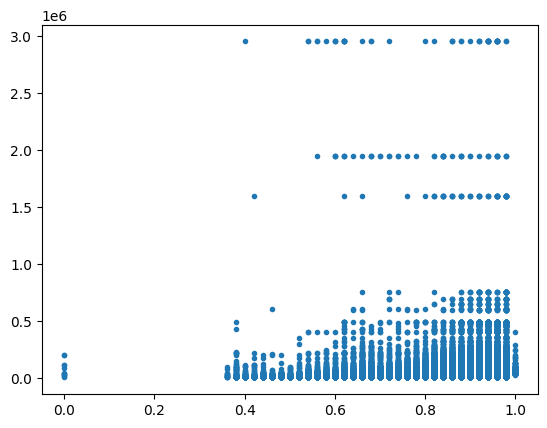

In [22]:
plt.plot(sales_train.model_year, sales_train.price, '.')

In [23]:
sales_test.model_year = min_max_scaler(sales_test, 'model_year')
sales_test.model_year.describe()

count    125690.000000
mean          0.835951
std           0.113476
min           0.000000
25%           0.780000
50%           0.860000
75%           0.920000
max           1.000000
Name: model_year, dtype: float64

# milage

In [24]:
sales_train.milage.describe()

count    188533.000000
mean      65705.295174
std       49798.158076
min         100.000000
25%       24115.000000
50%       57785.000000
75%       95400.000000
max      405000.000000
Name: milage, dtype: float64

In [25]:
sales_train.milage = min_max_scaler(sales_train, 'milage')
sales_train.milage.describe()

count    188533.000000
mean          0.162028
std           0.122989
min           0.000000
25%           0.059311
50%           0.142467
75%           0.235367
max           1.000000
Name: milage, dtype: float64

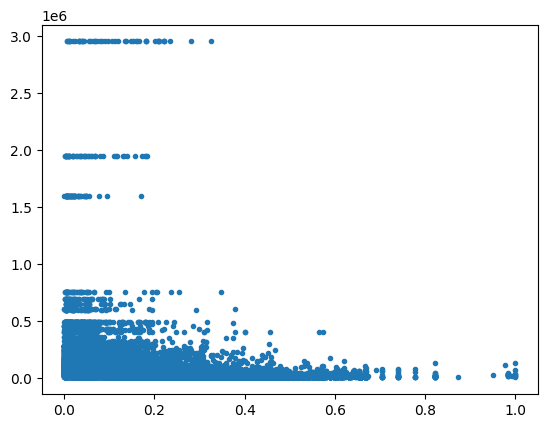

In [26]:
plt.plot(sales_train.milage, sales_train.price, '.')

In [27]:
sales_test.milage = min_max_scaler(sales_test, 'milage')
sales_test.milage.describe()

count    125690.000000
mean          0.162861
std           0.124040
min           0.000000
25%           0.060262
50%           0.141763
75%           0.236350
max           1.000000
Name: milage, dtype: float64

# fuel_type

In [28]:
sales_train.fuel_type.head(5)

0         Gasoline
1         Gasoline
2    E85 Flex Fuel
3         Gasoline
4         Gasoline
Name: fuel_type, dtype: object

In [29]:
fuel_count = sales_train.groupby(['fuel_type'])['fuel_type'].count()
fuel_count

fuel_type
Diesel              3955
E85 Flex Fuel       5406
Gasoline          165940
Hybrid              6832
Plug-In Hybrid       521
not supported         15
–                    781
Name: fuel_type, dtype: int64

<Axes: xlabel='fuel_type'>

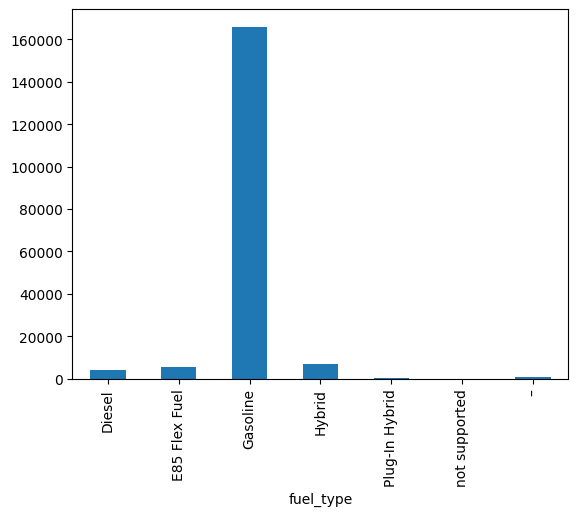

In [30]:
fuel_count.plot.bar()

In [31]:
sales_train.loc[sales_train['fuel_type'].isnull()].describe()

,brand,model,model_year,milage,price
count,5083.000000,5083.000000,5083.000000,5083.000000,5.083000e+03
mean,0.287914,0.236726,0.924836,0.074342,6.082261e+04
std,0.080749,0.071012,0.052172,0.074262,6.723707e+04
min,0.017356,0.014707,0.380000,0.000000,3.995000e+03
25%,0.289170,0.182789,0.880000,0.019511,3.500000e+04
50%,0.289170,0.217056,0.940000,0.050383,4.999900e+04
75%,0.289170,0.279139,0.960000,0.110892,7.295000e+04
max,1.000000,0.710729,1.000000,0.602371,2.954083e+06


In [32]:
sales_train.fuel_type.unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [33]:
sales_train.loc[sales_train.fuel_type=='–']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
532,0.128865,0.149195,0.94,0.086194,–,–,8-Speed A/T,Blue,Gray,None reported,Yes,48000
1155,0.178922,0.112102,0.86,0.354408,–,–,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,31000
1307,0.100290,0.077072,0.40,0.340659,–,–,A/T,Green,Beige,None reported,Yes,11999
1362,0.178922,0.112422,0.84,0.105952,–,–,A/T,Blue,Black,None reported,Yes,15500
1741,0.188089,0.078690,0.38,0.232403,–,–,A/T,Red,Gray,None reported,Yes,7599
...,...,...,...,...,...,...,...,...,...,...,...,...
187399,0.073892,0.006584,0.38,0.222524,–,–,5-Speed M/T,Gray,Black,At least 1 accident or damage reported,Yes,11500
187495,0.100973,0.062919,0.80,0.215374,–,284.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Brown,Gray,At least 1 accident or damage reported,Yes,10000
187664,0.253184,0.242282,0.38,0.035777,–,–,A/T,Red,Silver,None reported,Yes,65000
187820,0.085502,0.165919,0.86,0.141269,–,–,9-Speed A/T,Blue,Black,None reported,Yes,31700


In [34]:
sales_train.fuel_type = sales_train.fuel_type.apply(lambda x: 'not supported' if x=='–' else x)
sales_train.fuel_type.unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [35]:
sales_train.fuel_type.fillna('not supported', inplace=True)

/tmp/ipykernel_34/2162773726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_train.fuel_type.fillna('not supported', inplace=True)


In [36]:
sales_train.fuel_type.unique()

array(['Gasoline', 'E85 Flex Fuel', 'not supported', 'Hybrid', 'Diesel',
       'Plug-In Hybrid'], dtype=object)

In [37]:
sales_test.fuel_type = sales_test.fuel_type.apply(lambda x: 'not supported' if x=='–' else x)
sales_test.fuel_type.unique()

array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', nan,
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [38]:
sales_test.fuel_type.fillna('not supported', inplace=True)
sales_test.fuel_type.unique()

/tmp/ipykernel_34/3786693771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_test.fuel_type.fillna('not supported', inplace=True)


array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', 'not supported',
       'Plug-In Hybrid'], dtype=object)

In [39]:
sales_train.fuel_type = encoder.fit_transform(sales_train['fuel_type'], sales_train['price'])
sales_train.fuel_type.describe()

count    188533.000000
mean      43878.016178
std        4450.842411
min       26729.755457
25%       43360.013782
50%       43360.013782
75%       43360.013782
max       57477.680728
Name: fuel_type, dtype: float64

In [40]:
sales_train.fuel_type = min_max_scaler(sales_train, 'fuel_type')

In [41]:
sales_train.fuel_type.describe()

count    188533.000000
mean          0.557705
std           0.144753
min           0.000000
25%           0.540858
50%           0.540858
75%           0.540858
max           1.000000
Name: fuel_type, dtype: float64

In [42]:
sales_test.fuel_type = encoder.transform(sales_test['fuel_type'])

In [43]:
sales_test.fuel_type.describe()

count    125690.000000
mean      43904.239425
std        4447.659880
min       26729.755457
25%       43360.013782
50%       43360.013782
75%       43360.013782
max       57477.680728
Name: fuel_type, dtype: float64

In [44]:
sales_test.fuel_type = min_max_scaler(sales_test, 'fuel_type')
sales_test.fuel_type.describe()

count    125690.000000
mean          0.558557
std           0.144649
min           0.000000
25%           0.540858
50%           0.540858
75%           0.540858
max           1.000000
Name: fuel_type, dtype: float64

# engine 

In [45]:
len(sales_train.engine.unique())

1117

In [46]:
sales_train.engine = encoder.fit_transform(sales_train.engine, sales_train.price)

In [47]:
sales_train.fuel_type.describe()

count    188533.000000
mean          0.557705
std           0.144753
min           0.000000
25%           0.540858
50%           0.540858
75%           0.540858
max           1.000000
Name: fuel_type, dtype: float64

In [48]:
sales_train.engine = min_max_scaler(sales_train, 'engine')
sales_train.engine.describe()

count    188533.000000
mean          0.163852
std           0.126608
min           0.000000
25%           0.067389
50%           0.142291
75%           0.216948
max           1.000000
Name: engine, dtype: float64

In [49]:
sales_test.engine = encoder.transform(sales_test.engine)
sales_test.engine = min_max_scaler(sales_test, 'engine')
sales_test.engine.describe()

count    125690.000000
mean          0.163730
std           0.127169
min           0.000000
25%           0.067215
50%           0.142291
75%           0.216496
max           1.000000
Name: engine, dtype: float64

# transmission

In [50]:
sales_train.transmission.describe()

count     188533
unique        52
top          A/T
freq       49904
Name: transmission, dtype: object

In [51]:
len(sales_train.transmission.unique())

52

In [52]:
sales_train.transmission = encoder.fit_transform(sales_train.transmission, sales_train.price)

In [53]:
sales_train.transmission = min_max_scaler(sales_train, 'transmission')
sales_train.transmission.describe()

count    188533.000000
mean          0.192424
std           0.121566
min           0.000000
25%           0.107542
50%           0.157688
75%           0.280446
max           1.000000
Name: transmission, dtype: float64

In [54]:
sales_test.transmission = encoder.transform(sales_test.transmission)
sales_test.transmission = min_max_scaler(sales_test, 'transmission')
sales_test.transmission.describe()

count    125690.000000
mean          0.192362
std           0.120909
min           0.000000
25%           0.107542
50%           0.157688
75%           0.280446
max           1.000000
Name: transmission, dtype: float64

# ext_col

In [55]:
sales_train.ext_col.describe()

count     188533
unique       319
top        Black
freq       48658
Name: ext_col, dtype: object

In [56]:
sales_train.ext_col = encoder.fit_transform(sales_train.ext_col, sales_train.price)
sales_train.ext_col = min_max_scaler(sales_train, 'ext_col')
sales_train.ext_col.describe()

count    188533.000000
mean          0.093374
std           0.060129
min           0.000000
25%           0.079763
50%           0.087749
75%           0.087749
max           1.000000
Name: ext_col, dtype: float64

In [57]:
sales_test.ext_col = encoder.transform(sales_test.ext_col)

In [58]:
sales_test.ext_col = min_max_scaler(sales_test, 'ext_col')
sales_test.ext_col.describe()

count    125690.000000
mean          0.093284
std           0.060706
min           0.000000
25%           0.079763
50%           0.087749
75%           0.087749
max           1.000000
Name: ext_col, dtype: float64

<Axes: ylabel='Density'>

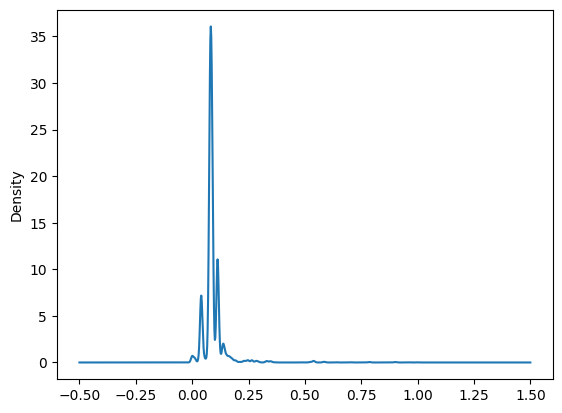

In [59]:
sales_train.ext_col.plot.kde()

# int_col

In [60]:
sales_train.int_col = encoder.fit_transform(sales_train.int_col, sales_train.price)
sales_train.int_col = min_max_scaler(sales_train, 'int_col')

<Axes: ylabel='Density'>

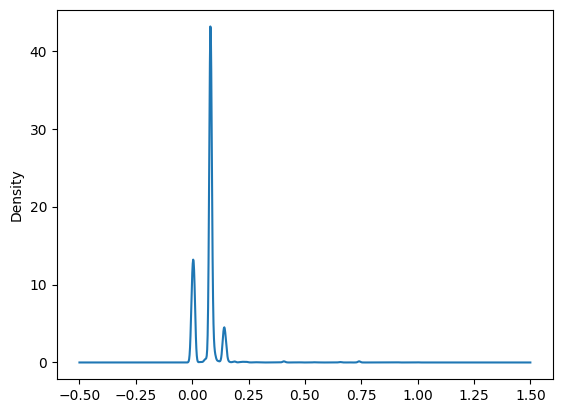

In [61]:
sales_train.int_col.plot.kde()

In [62]:
sales_test.int_col = encoder.transform(sales_test.int_col)
sales_test.int_col = min_max_scaler(sales_test, 'int_col')
sales_test.int_col.describe()

count    125690.000000
mean          0.072843
std           0.063384
min           0.000000
25%           0.061843
50%           0.081274
75%           0.081274
max           1.000000
Name: int_col, dtype: float64

# accident and clean title

back to clean null values again...

In [63]:
sales_train.accident.describe()

count            186081
unique                2
top       None reported
freq             144514
Name: accident, dtype: object

In [64]:
sales_train.accident.unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [65]:
sales_train.clean_title.describe()

count     167114
unique         1
top          Yes
freq      167114
Name: clean_title, dtype: object

In [66]:
sales_train.clean_title.unique()

array(['Yes', nan], dtype=object)

In [67]:
sales_train.loc[sales_train.clean_title=='Yes', 'clean_title'] = True
sales_train.clean_title.unique()

array([True, nan], dtype=object)

In [68]:
sales_train.clean_title.fillna(False, inplace=True)

/tmp/ipykernel_34/3833830275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_train.clean_title.fillna(False, inplace=True)
/tmp/ipykernel_34/3833830275.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales_train.clean_title.fillna(False, inplace=True)


In [69]:
sales_train.clean_title.unique()

array([ True, False])

In [70]:
sales_test.clean_title.unique()

array(['Yes', nan], dtype=object)

In [71]:
sales_test.loc[sales_test.clean_title=='Yes', 'clean_title'] = True
sales_test.clean_title.unique()

array([True, nan], dtype=object)

In [72]:
sales_test.clean_title.fillna(False, inplace=True)

/tmp/ipykernel_34/2333733166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_test.clean_title.fillna(False, inplace=True)
/tmp/ipykernel_34/2333733166.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales_test.clean_title.fillna(False, inplace=True)


In [73]:
sales_train.loc[sales_train.accident.isnull(), 'clean_title'].unique()

array([False,  True])

In [74]:
tmp = sales_train.loc[sales_train.accident.isnull(), ['clean_title', 'price']]
tmp = tmp.groupby(by='clean_title')

In [75]:
tmp.price.mean()

clean_title
False    54978.972108
True     41671.071429
Name: price, dtype: float64

In [76]:
sales_train.accident = sales_train.apply(lambda x: 1 if x['accident']=='At least 1 accident or damage reported' else 0, axis=1)
sales_train.accident.unique()

array([0, 1])

In [77]:
sales_test.accident = sales_test.apply(lambda x: 1 if x['accident']=='At least 1 accident or damage reported' else 0, axis=1)
sales_test.accident.unique()

array([0, 1])

# final check of data cleaning

In [78]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         188533 non-null  float64
 1   model         188533 non-null  float64
 2   model_year    188533 non-null  float64
 3   milage        188533 non-null  float64
 4   fuel_type     188533 non-null  float64
 5   engine        188533 non-null  float64
 6   transmission  188533 non-null  float64
 7   ext_col       188533 non-null  float64
 8   int_col       188533 non-null  float64
 9   accident      188533 non-null  int64  
 10  clean_title   188533 non-null  bool   
 11  price         188533 non-null  int64  
dtypes: bool(1), float64(9), int64(2)
memory usage: 16.0 MB


In [79]:
sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         125690 non-null  float64
 1   model         125690 non-null  float64
 2   model_year    125690 non-null  float64
 3   milage        125690 non-null  float64
 4   fuel_type     125690 non-null  float64
 5   engine        125690 non-null  float64
 6   transmission  125690 non-null  float64
 7   ext_col       125690 non-null  float64
 8   int_col       125690 non-null  float64
 9   accident      125690 non-null  int64  
 10  clean_title   125690 non-null  bool   
dtypes: bool(1), float64(9), int64(1)
memory usage: 9.7 MB


In [80]:
X = sales_train.loc[:, sales_train.columns.delete(-1)]
y = sales_train.loc[:, 'price']

# correlation

In [81]:
sales_train.corr().loc[:, 'price']

brand           0.213457
model           0.336995
model_year      0.231795
milage         -0.283067
fuel_type       0.056469
engine          0.349740
transmission    0.221576
ext_col         0.182008
int_col         0.178481
accident       -0.125122
clean_title    -0.089433
price           1.000000
Name: price, dtype: float64

we could see that engine and models has the greatest revelance with sales price, 

# real model training and hyperparameter tuning

In [82]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error as mse
import optuna
import math
from sklearn.model_selection import StratifiedKFold as SKF

## HT

In [83]:
def objective(trial):
    param = {
       'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth',0, 5),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 20,100),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 100, 300),
        'feature_fraction': trial.suggest_float('feature_fraction',0.5, 1),
        'bagging_fraction': trial.suggest_float('bagging_fraction',0.5, 1),
        'bagging_freq': trial.suggest_int('bagging_freq',1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha',0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda',0, 10),
        'objective': 'regression',
        'metric': 'rmse',
    }
    
    skf = SKF(n_splits=10, shuffle=True)
    model = lgb.LGBMRegressor(**param, verbosity=-1)
    error = []
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        model.fit(X_train, y_train)
        preds = model.predict(X_test, num_iteration=model.best_iteration_)
        error.append(mse(y_test, preds, squared = False))
    return sum(error)/len(error)

In [84]:
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction='minimize', pruner = pruner)
study.optimize(objective, n_trials=50)

[I 2024-09-30 07:44:04,321] A new study created in memory with name: no-name-4f45bb47-0afd-494f-b640-eb17a5b0eb9f
[I 2024-09-30 07:44:54,605] Trial 0 finished with value: 72536.71983079812 and parameters: {'learning_rate': 0.09824971109254818, 'n_estimators': 1000, 'max_depth': 1, 'num_leaves': 83, 'min_child_weight': 83, 'min_data_in_leaf': 244, 'feature_fraction': 0.5055432708140559, 'bagging_fraction': 0.7397798764277064, 'bagging_freq': 3, 'reg_alpha': 0.12461879102286466, 'reg_lambda': 2.838555715022635}. Best is trial 0 with value: 72536.71983079812.
[I 2024-09-30 07:45:57,969] Trial 1 finished with value: 72472.50222062338 and parameters: {'learning_rate': 0.013975442001629094, 'n_estimators': 922, 'max_depth': 2, 'num_leaves': 55, 'min_child_weight': 100, 'min_data_in_leaf': 223, 'feature_fraction': 0.9961092078064875, 'bagging_fraction': 0.919484814503549, 'bagging_freq': 8, 'reg_alpha': 1.1617458028715122, 'reg_lambda': 8.114342895987006}. Best is trial 1 with value: 72472.50

KeyboardInterrupt: 

## HT Visual

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_slice(study)

## model fitting

In [ ]:
print(study.best_params)

In [ ]:
param = study.best_params
final_model = lgb.LGBMRegressor(**param, verbosity=-1)

In [ ]:
final_model.fit(X,y)
pred = final_model.predict(sales_test)

In [ ]:
submission = pd.DataFrame(pred)
submission.rename(columns = {0:'price'}, inplace=True)
submission = pd.concat([test_id, submission],axis=1)

In [ ]:
submission.head()

In [ ]:
submission.to_csv('/kaggle/working/submission.csv', index=False)